In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import imblearn
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
df = pd.read_csv('Class Notebooks/datasets/HR_data.csv')
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
SLNO                           8995 non-null int64
Candidate.Ref                  8995 non-null int64
DOJ.Extended                   8995 non-null object
Duration.to.accept.offer       8995 non-null int64
Notice.period                  8995 non-null int64
Offered.band                   8995 non-null object
Pecent.hike.expected.in.CTC    8995 non-null float64
Percent.hike.offered.in.CTC    8995 non-null float64
Percent.difference.CTC         8995 non-null float64
Joining.Bonus                  8995 non-null object
Candidate.relocate.actual      8995 non-null object
Gender                         8995 non-null object
Candidate.Source               8995 non-null object
Rex.in.Yrs                     8995 non-null int64
LOB                            8995 non-null object
Location                       8995 non-null object
Age                            8995 non-null int64
Status      

In [4]:
df['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

# Visualizations

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_with_numerics = df.select_dtypes(include=numerics)
df_with_numerics = df_with_numerics.drop(['SLNO', 'Candidate.Ref'], 1)
df_with_numerics.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
0,14,30,-20.79,13.16,42.86,7,34
1,18,30,50.00,320.00,180.00,8,34
2,3,45,42.84,42.84,0.00,4,27
3,26,30,42.84,42.84,0.00,4,34
4,1,120,42.59,42.59,0.00,6,34


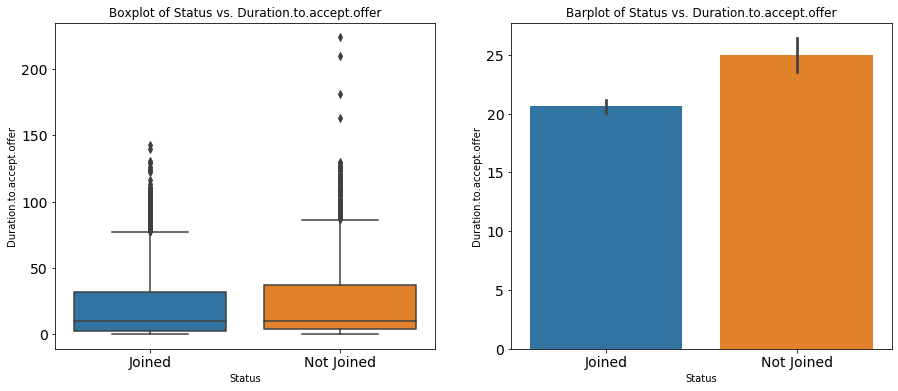

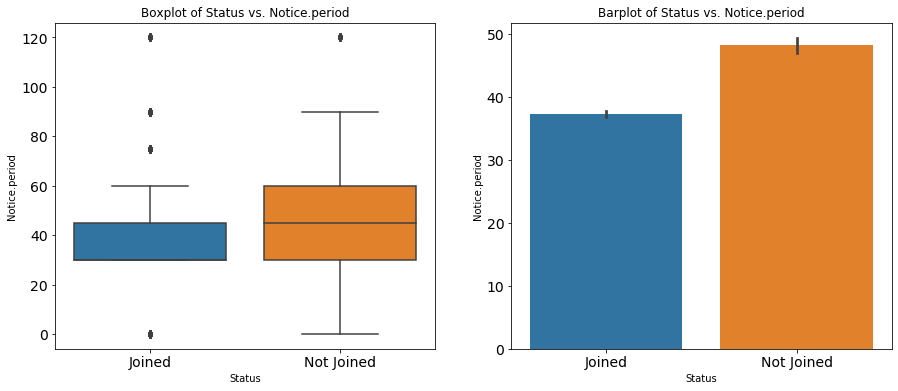

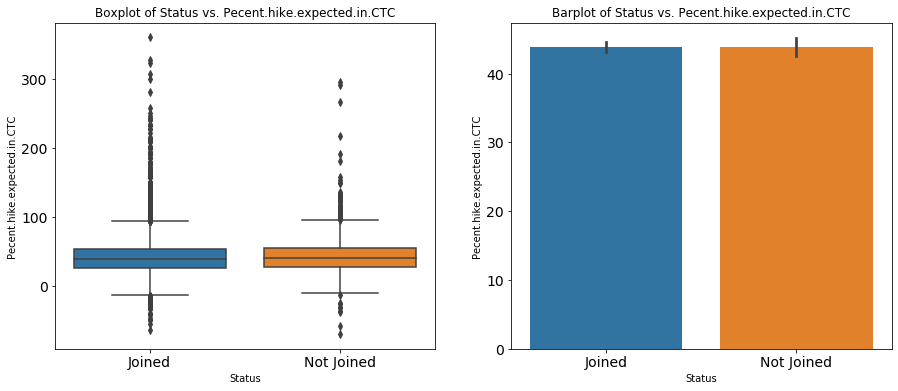

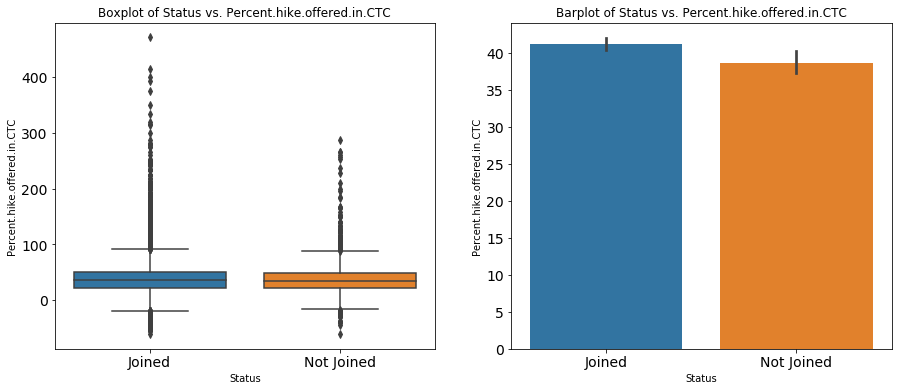

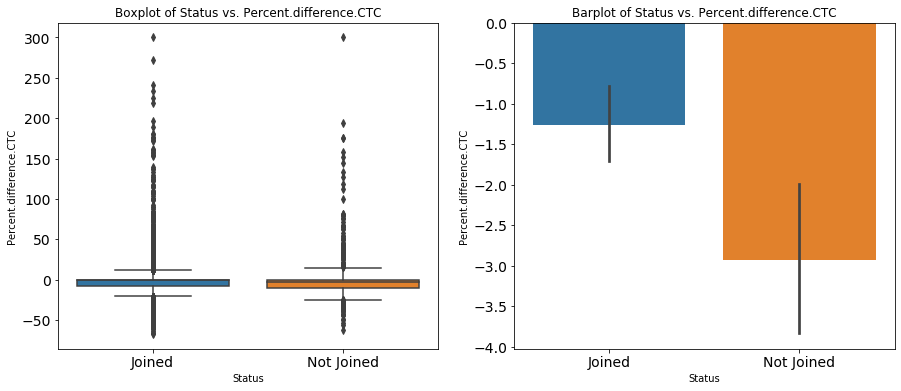

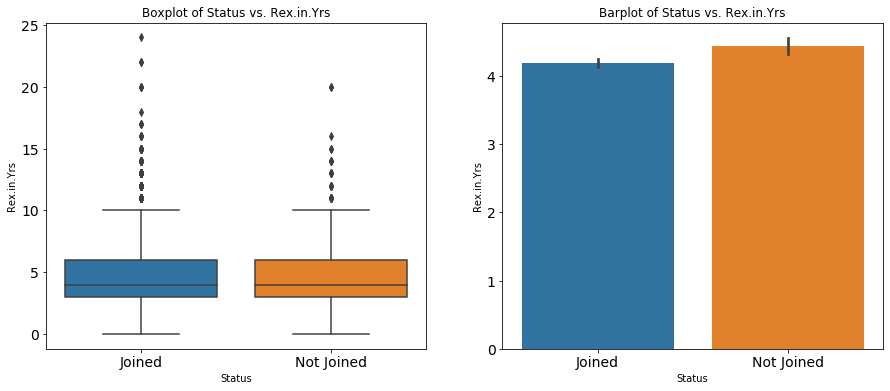

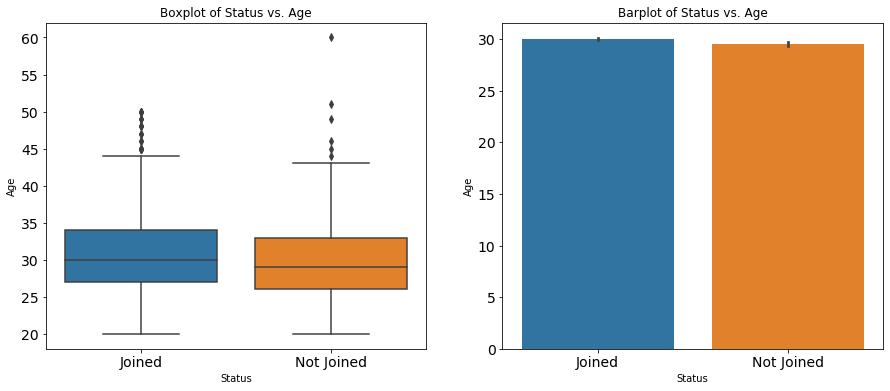

In [6]:
for column in df_with_numerics.columns:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title(f'Boxplot of Status vs. {column}')
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  sns.boxplot('Status', column, data=df)
  plt.subplot(1,2,2)
  plt.title(f'Barplot of Status vs. {column}')
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  sns.barplot('Status', column, data=df)
  plt.show()

In [7]:
category_types = ['object', 'bool', 'category']
df_with_categories = df.select_dtypes(include=category_types)
df_with_categories.head()

,DOJ.Extended,Offered.band,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,LOB,Location,Status
0,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


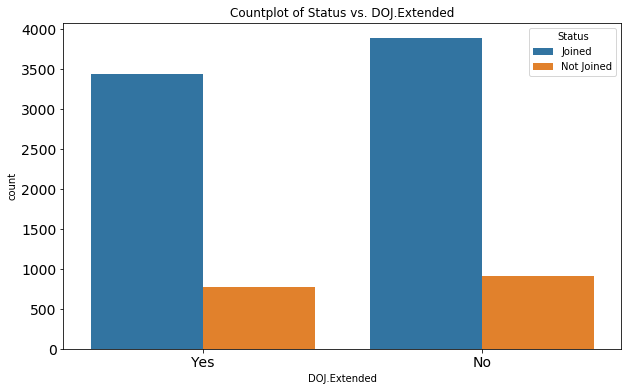

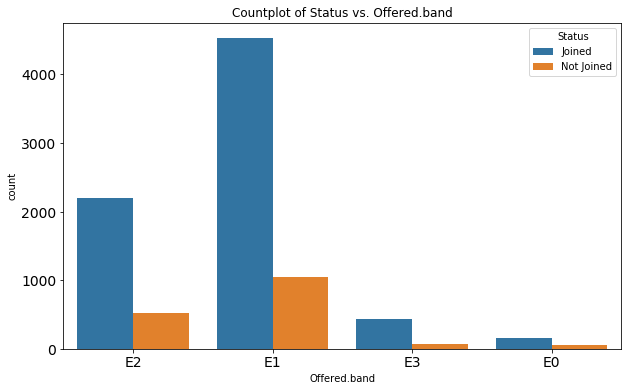

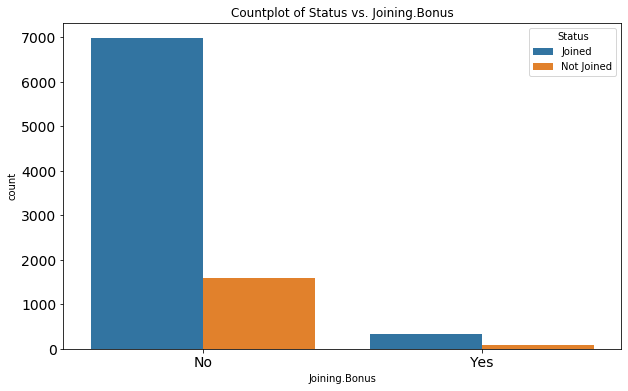

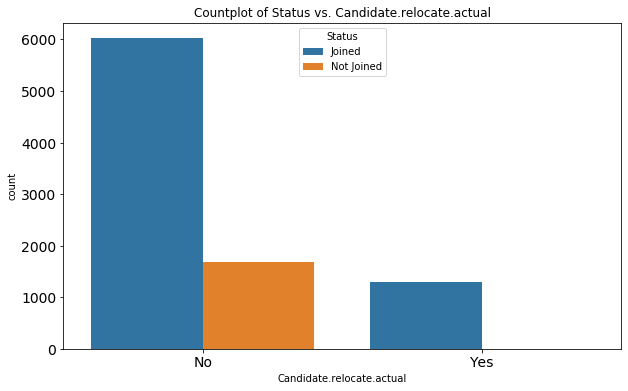

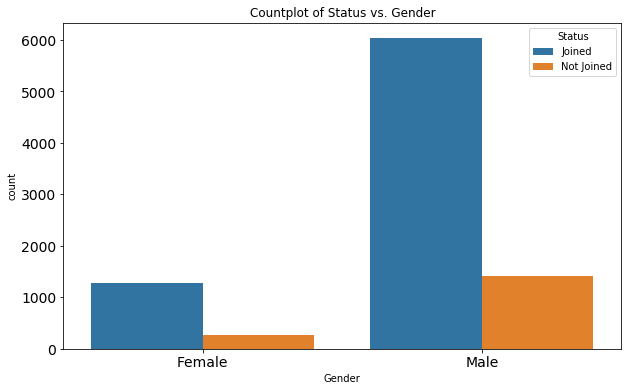

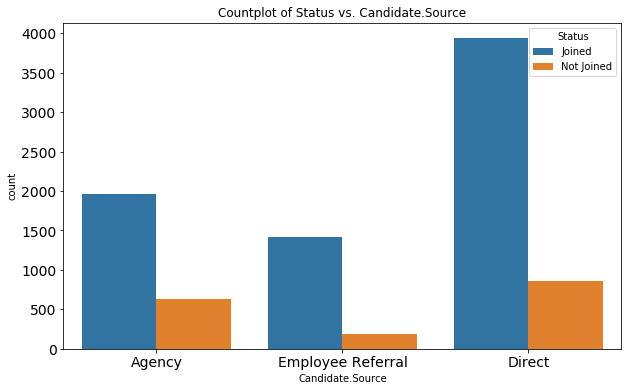

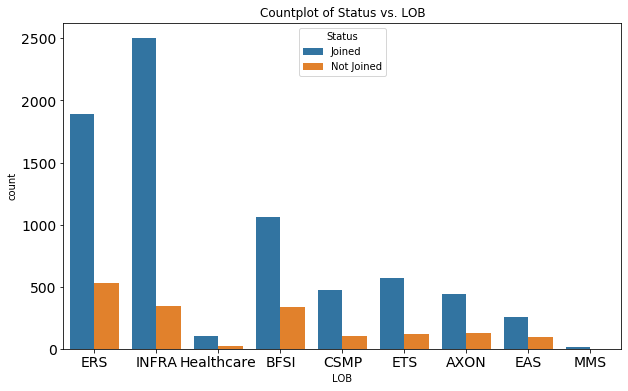

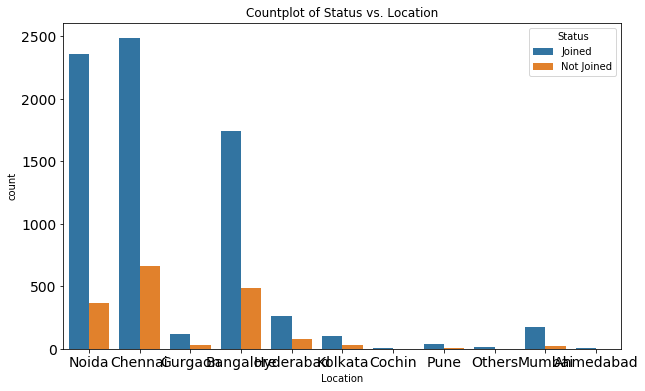

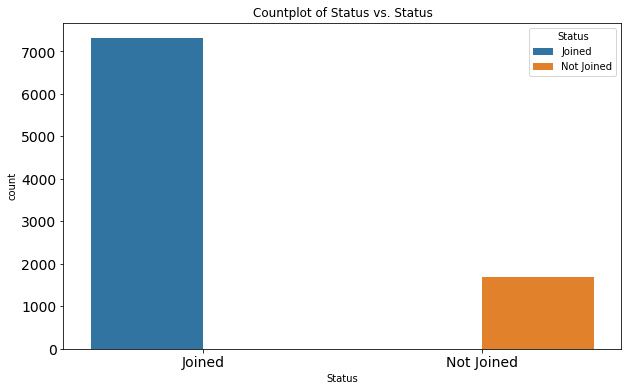

In [8]:
for column in df_with_categories:
  plt.figure(figsize=(10,6))
  plt.title(f'Countplot of Status vs. {column}')
  sns.countplot(column,hue='Status',data=df_with_categories)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()

# Data Preprocessing

In [9]:
df = df.drop(['SLNO', 'Candidate.Ref'],1)
df.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


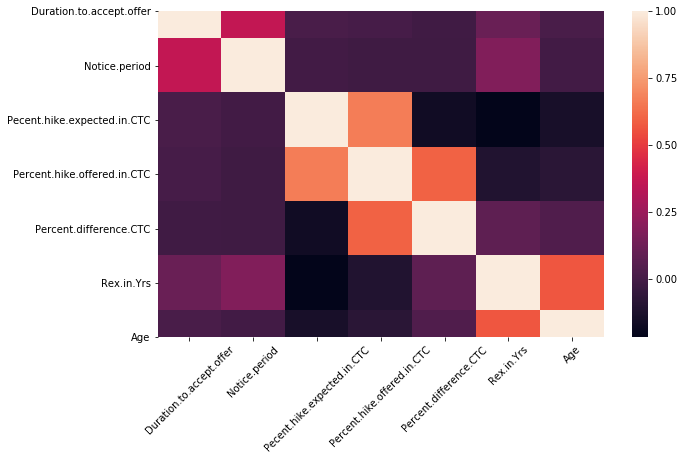

In [10]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.xticks(rotation=45)
plt.show()

In [11]:
df = df.drop(['Pecent.hike.expected.in.CTC', 'Percent.hike.offered.in.CTC', 'Age'],1)
df.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Status
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,ERS,Noida,Joined
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,Joined
2,No,3,45,E2,0.00,No,No,Male,Agency,4,INFRA,Noida,Joined
3,No,26,30,E2,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,Joined
4,Yes,1,120,E2,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,Joined


In [12]:
dummy_vars = pd.get_dummies(df_with_categories.drop('Status',1), drop_first=True) # Dummy Variable Trap
dummy_vars.head()

,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,Offered.band_E3,Joining.Bonus_Yes,Candidate.relocate.actual_Yes,Gender_Male,Candidate.Source_Direct,Candidate.Source_Employee Referral,LOB_BFSI,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df_with_dummies = pd.concat([dummy_vars,df],1)
df_with_dummies

,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,Offered.band_E3,Joining.Bonus_Yes,Candidate.relocate.actual_Yes,Gender_Male,Candidate.Source_Direct,Candidate.Source_Employee Referral,LOB_BFSI,...,Offered.band,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Status
0,1,0,1,0,0,0,0,0,0,0,...,E2,42.86,No,No,Female,Agency,7,ERS,Noida,Joined
1,0,0,1,0,0,0,1,0,1,0,...,E2,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,Joined
2,0,0,1,0,0,0,1,0,0,0,...,E2,0.00,No,No,Male,Agency,4,INFRA,Noida,Joined
3,0,0,1,0,0,0,1,0,1,0,...,E2,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,Joined
4,1,0,1,0,0,1,1,0,1,0,...,E2,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,0,1,0,0,0,0,1,0,1,0,...,E1,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,Joined
8991,1,1,0,0,0,0,0,1,0,1,...,E1,0.00,No,No,Female,Direct,3,BFSI,Chennai,Joined
8992,0,0,1,0,0,0,1,1,0,0,...,E2,0.00,No,No,Male,Direct,5,INFRA,Noida,Joined
8993,0,1,0,0,0,0,1,1,0,0,...,E1,-13.04,No,No,Male,Direct,4,INFRA,Noida,Joined


In [14]:
X_categories = df_with_categories.drop('Status',1).columns
X_categories

Index(['DOJ.Extended', 'Offered.band', 'Joining.Bonus',
       'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'LOB',
       'Location'],
      dtype='object')

In [15]:
df_with_dummies.drop(X_categories,1, inplace=True)
df_with_dummies

,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,Offered.band_E3,Joining.Bonus_Yes,Candidate.relocate.actual_Yes,Gender_Male,Candidate.Source_Direct,Candidate.Source_Employee Referral,LOB_BFSI,...,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Duration.to.accept.offer,Notice.period,Percent.difference.CTC,Rex.in.Yrs,Status
0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,14,30,42.86,7,Joined
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,18,30,180.00,8,Joined
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,3,45,0.00,4,Joined
3,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,26,30,0.00,4,Joined
4,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,120,0.00,6,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,4,0,0.00,1,Joined
8991,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,2,0,0.00,3,Joined
8992,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0.00,5,Joined
8993,0,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,30,-13.04,4,Joined


In [16]:
df_with_dummies['Status'] = df_with_dummies.loc[:,'Status'].replace(['Joined', 'Not Joined'], [1,0])
df_with_dummies

,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,Offered.band_E3,Joining.Bonus_Yes,Candidate.relocate.actual_Yes,Gender_Male,Candidate.Source_Direct,Candidate.Source_Employee Referral,LOB_BFSI,...,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Duration.to.accept.offer,Notice.period,Percent.difference.CTC,Rex.in.Yrs,Status
0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,14,30,42.86,7,1
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,18,30,180.00,8,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,3,45,0.00,4,1
3,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,26,30,0.00,4,1
4,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,120,0.00,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,4,0,0.00,1,1
8991,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,2,0,0.00,3,1
8992,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0.00,5,1
8993,0,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,30,-13.04,4,1


# Functions

In [0]:
def print_model_stats(clf, X_test, y_test, threshold=0.5, prob_frequency=30, cost_matrix=None, cm=False):
  '''
  Params:
  clf --> Your fitted sklearn binary classifier
  X_test --> Test Features
  y_test --> Test Labels (Should only consist of 0's and 1's)
  threshold --> Prediction based on threshold (Default is 0.5)
  prob --> Frequency of probability annotations in ROC Curve
  cost-matrix -->  Numpy array should be of the format
  [
    [Cost_of_TP, Cost_of_FP],
    [Cost_of_FN, Cost_of_TN]
  ]
  cm --> Print Confusion Matrix and return it in the form tp,fp,fn,tn
  '''
  if cost_matrix is None:
    y_predict = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)
  elif cost_matrix.shape != (2,2):
    raise Exception('Invalid Cost Matrix Shape')
  else:
    cost_tp = cost_matrix[0][0]
    cost_fp = cost_matrix[0][1]
    cost_fn = cost_matrix[1][0]
    cost_tn = cost_matrix[1][1]
    probs = clf.predict_proba(X_test)[:,1]
    cost_true = (probs*cost_tp) + (1 - probs)*cost_fp
    cost_false = (probs*cost_fn) + (1 - probs)*cost_tn
    y_predict = (cost_true < cost_false).astype(int)
  tp = tn = fn = fp = 0
  for i, y in enumerate(y_test):
    if y==1:
      if y_predict[i] == 1: # Predicted 1 and Actual 1 --> TP
        tp += 1
      elif y_predict[i] == 0: # Predicted 0 and Actual 1 --> FN
        fn += 1
    elif y==0:
      if y_predict[i] == 0: # Predicted 0 and Actual 0 -->  TN
        tn += 1
      elif y_predict[i] == 1: # Predicted  and Actual 0 --> FP
        fp += 1
  print('Sensitivity (TPR): ',  tp / (tp + fn))
  print('Specificity (TNR): ',  tn / (tn + fp))
  print('Miss Rate (FNR): ',  fn / (tp + fn))
  print('Fall-Out (FPR): ',  fp / (tn + fp))
  print('\nAccuracy: ',  (tp + tn) / (tp + fn + tn + fp))
  print('Precision: ',  tp / (tp + fp))
  print('Kappa Score: ', cohen_kappa_score(y_test,y_predict))

  print('FP/FN Ratio: ', fp/fn)
  logit_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
  fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  plt.figure(figsize=(10,6))
  plt.plot(fpr, tpr, label='(AUC = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  for i in range(len(thresholds)):
    if i%prob_frequency==0:
        plt.text(fpr[i], tpr[i], f'{thresholds[i]: .2f}')   
  plt.show()
  if cm:
    cm = confusion_matrix(y_test, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['-ve', '+ve'])
    ax.yaxis.set_ticklabels(['-ve', '+ve'])
    plt.show()
    return tp,fp,fn,tn

# Baseline Model
Using Logistic Regression

In [19]:
np.random.seed(1000)
X = df_with_dummies.drop(['Status'], 1)
y = df_with_dummies['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7196, 31), (1799, 31), (7196,), (1799,))

In [20]:
clf = LogisticRegression(class_weight=None)
clf.fit(X_train, y_train)

/home/sachin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Sensitivity (TPR):  0.9896623018607856
Specificity (TNR):  0.05172413793103448
Miss Rate (FNR):  0.010337698139214336
Fall-Out (FPR):  0.9482758620689655

Accuracy:  0.8082267926625903
Precision:  0.8131370328425821
Kappa Score:  0.06309296838558631
FP/FN Ratio:  22.0


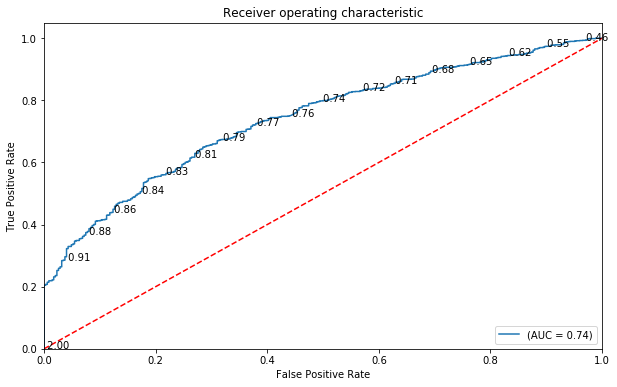

In [21]:
print_model_stats(clf, X_test,y_test)

Bad Model with Kappa Score = **0.06**. <br> Going towards good TPR and bad TNR at <b>threshold = 0.5</b>. <br>This is because of class imbalance

# Handling Class Imbalance
Using SMOTE

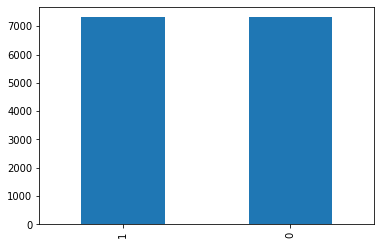

In [22]:
X_resample,y_resample = SMOTE(k_neighbors=7).fit_resample(X, y)
X_resample = pd.DataFrame(X_resample, columns = X.columns)
pd.Series(y_resample).value_counts().plot.bar()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11700, 31), (2926, 31), (11700,), (2926,))

/home/sachin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Sensitivity (TPR):  0.5767123287671233
Specificity (TNR):  0.781718963165075
Miss Rate (FNR):  0.4232876712328767
Fall-Out (FPR):  0.21828103683492497

Accuracy:  0.6794258373205742
Precision:  0.7246127366609294
Kappa Score:  0.3585810664904233
FP/FN Ratio:  0.517799352750809


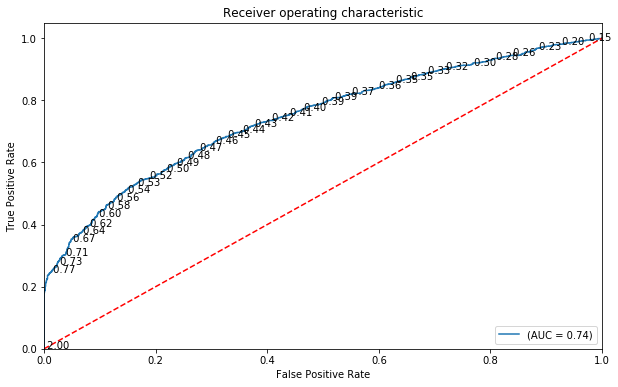

In [24]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print_model_stats(clf, X_test,y_test)

<ul>
<li> Kappa score has improved to 0.24</li>
<li> Sensitivity and Specificity is more balanced now</li>
</ul>

# Feature Engineering
I am using Lasso Regression to get the important features with 5 fold cross validation

In [25]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=
              5,n_jobs=-1)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
coef

Best alpha using built-in LassoCV: 0.002734
Best score using built-in LassoCV: 0.176351


DOJ.Extended_Yes                      0.034927
Offered.band_E1                       0.020527
Offered.band_E2                       0.000000
Offered.band_E3                       0.000000
Joining.Bonus_Yes                    -0.000000
Candidate.relocate.actual_Yes         0.467781
Gender_Male                          -0.000000
Candidate.Source_Direct               0.039188
Candidate.Source_Employee Referral    0.151275
LOB_BFSI                              0.000000
LOB_CSMP                              0.000000
LOB_EAS                              -0.017395
LOB_ERS                              -0.000000
LOB_ETS                               0.011195
LOB_Healthcare                        0.000000
LOB_INFRA                             0.104892
LOB_MMS                               0.000000
Location_Bangalore                   -0.000000
Location_Chennai                     -0.033904
Location_Cochin                       0.000000
Location_Gurgaon                      0.000000
Location_Hyde

In [26]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 17 variables


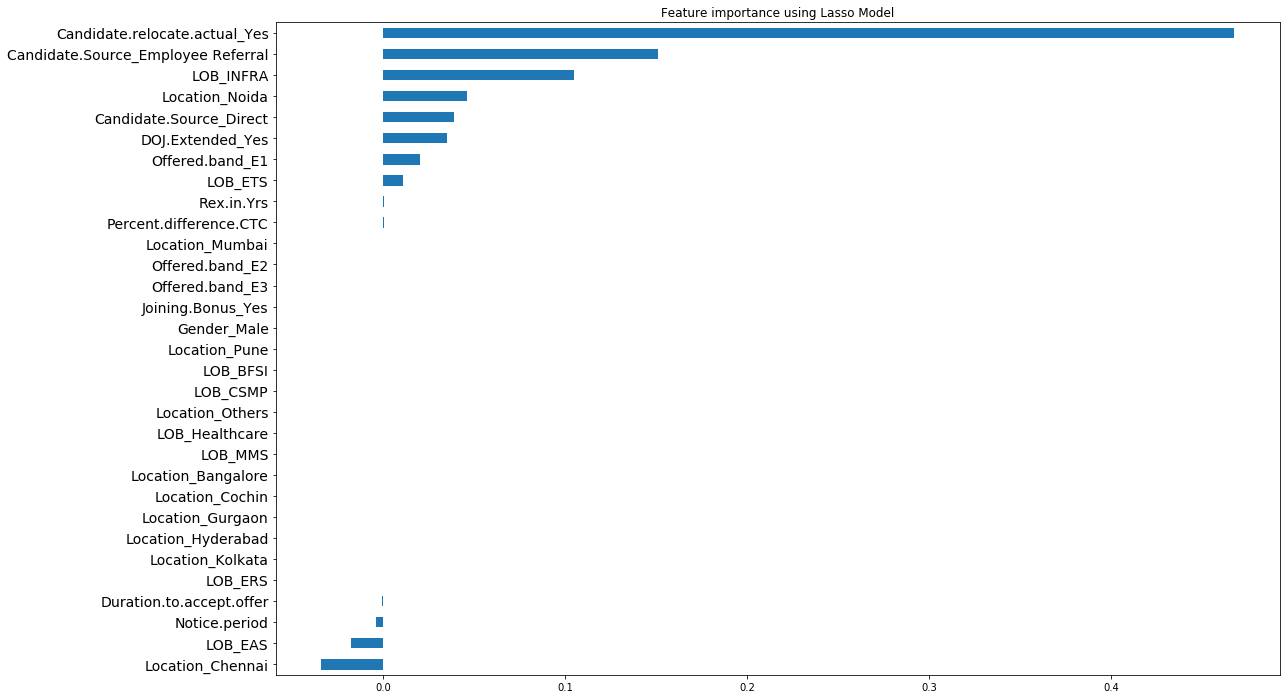

In [27]:
imp_coef = coef.sort_values()
import matplotlib
plt.figure(figsize=(18,12))
imp_coef.plot(kind = "barh")
plt.yticks(fontsize=14)
plt.title("Feature importance using Lasso Model")
plt.show()

In [28]:
target_features = sum(coef != 0)
lasso_features = list(imp_coef[imp_coef!=0].sort_values(ascending=False).index)[:target_features]
lasso_features

['Candidate.relocate.actual_Yes',
 'Candidate.Source_Employee Referral',
 'LOB_INFRA',
 'Location_Noida',
 'Candidate.Source_Direct',
 'DOJ.Extended_Yes',
 'Offered.band_E1',
 'LOB_ETS',
 'Rex.in.Yrs',
 'Percent.difference.CTC',
 'Duration.to.accept.offer',
 'Notice.period',
 'LOB_EAS',
 'Location_Chennai']

In [0]:
X_train_lasso_features = X_train[lasso_features]
X_test_lasso_features = X_test[lasso_features]

/home/sachin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Sensitivity (TPR):  0.5835616438356165
Specificity (TNR):  0.7701227830832197
Miss Rate (FNR):  0.41643835616438357
Fall-Out (FPR):  0.22987721691678034

Accuracy:  0.6770334928229665
Precision:  0.7165685449957948
Kappa Score:  0.35381882239558193
FP/FN Ratio:  0.5542763157894737


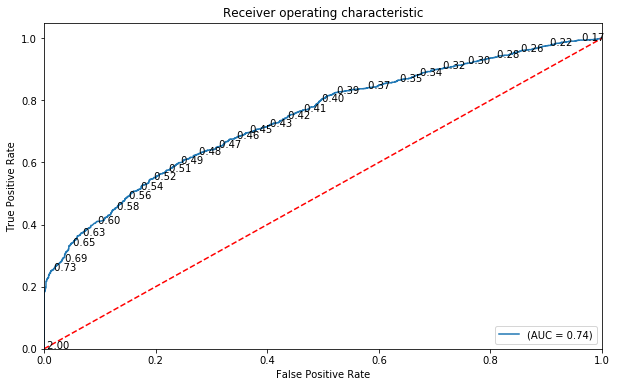

In [30]:
clf = LogisticRegression()
clf.fit(X_train_lasso_features, y_train)
print_model_stats(clf, X_test_lasso_features,y_test,prob_frequency=40)

# Selecting Threshold

/home/sachin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Sensitivity (TPR):  0.8253424657534246
Specificity (TNR):  0.4761255115961801
Miss Rate (FNR):  0.17465753424657535
Fall-Out (FPR):  0.5238744884038199

Accuracy:  0.650375939849624
Precision:  0.6107450582868728
Kappa Score:  0.30125136619420423
FP/FN Ratio:  3.011764705882353


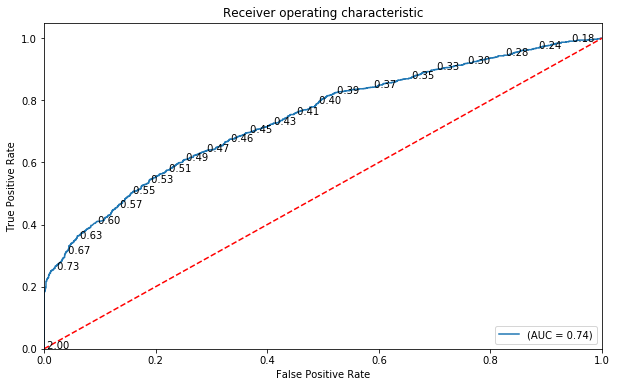

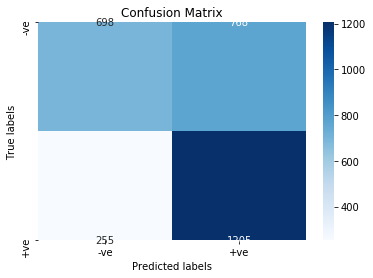

(1205, 768, 255, 698)

In [31]:
clf = LogisticRegression()
clf.fit(X_train_lasso_features, y_train)
threshold = 0.3835 # Threshold to get target FP/FN Ratio
print_model_stats(clf, X_test_lasso_features,y_test,threshold=threshold,prob_frequency=50, cm=True)

# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

Sensitivity (TPR):  0.8308219178082191
Specificity (TNR):  0.8356070941336972
Miss Rate (FNR):  0.16917808219178082
Fall-Out (FPR):  0.16439290586630287

Accuracy:  0.8332194121667806
Precision:  0.8342503438789546
Kappa Score:  0.6664346165239012
FP/FN Ratio:  0.9757085020242915


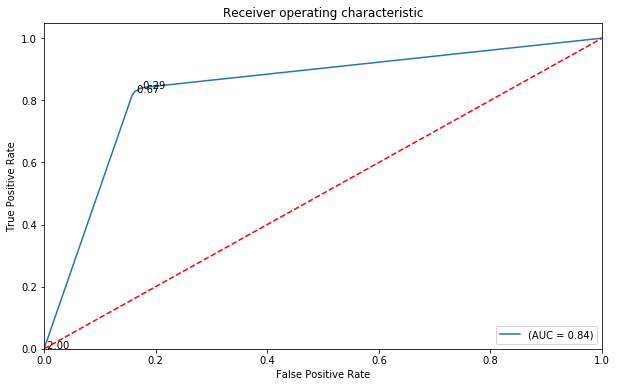

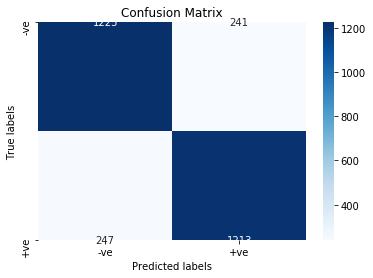

In [33]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_lasso_features, y_train)
cm = print_model_stats(tree_clf, X_test_lasso_features,y_test,prob_frequency=5, cm=True)

# Tuning the Tree

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

max_depth = range(4, 10, 1) # Minimum depth I took is 4 to get atleast a few rules about the data
criterion = ['gini', 'entropy']
splitter = ['random', 'best']
min_samples_split = [100, 200, 300]
min_samples_leaf = [50, 100, 150]
param_grid = dict(max_depth=max_depth, criterion = criterion, splitter=splitter,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_lasso_features, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:   15.5s


Best: 0.902267 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   30.3s finished


Sensitivity (TPR):  0.9178082191780822
Specificity (TNR):  0.6964529331514324
Miss Rate (FNR):  0.0821917808219178
Fall-Out (FPR):  0.3035470668485675

Accuracy:  0.8069036226930963
Precision:  0.7507002801120448
Kappa Score:  0.6139814648338536
FP/FN Ratio:  3.7083333333333335


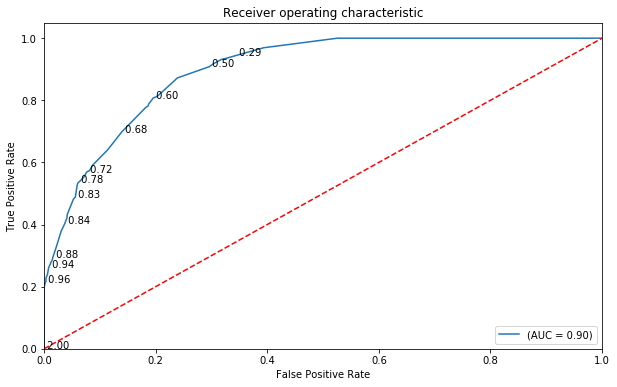

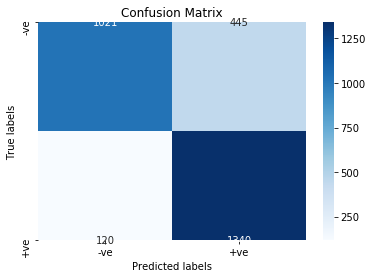

In [35]:
#Build using best params
tree_clf_tuned = DecisionTreeClassifier(max_depth=9, criterion='entropy', splitter='best', 
                                        min_samples_split=100,min_samples_leaf=50)
tree_clf_tuned.fit(X_train_lasso_features, y_train)
cm = print_model_stats(tree_clf_tuned, X_test_lasso_features,y_test,prob_frequency=4,threshold=0.5,cm=True)

# Tree in Graphviz

/home/sachin/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


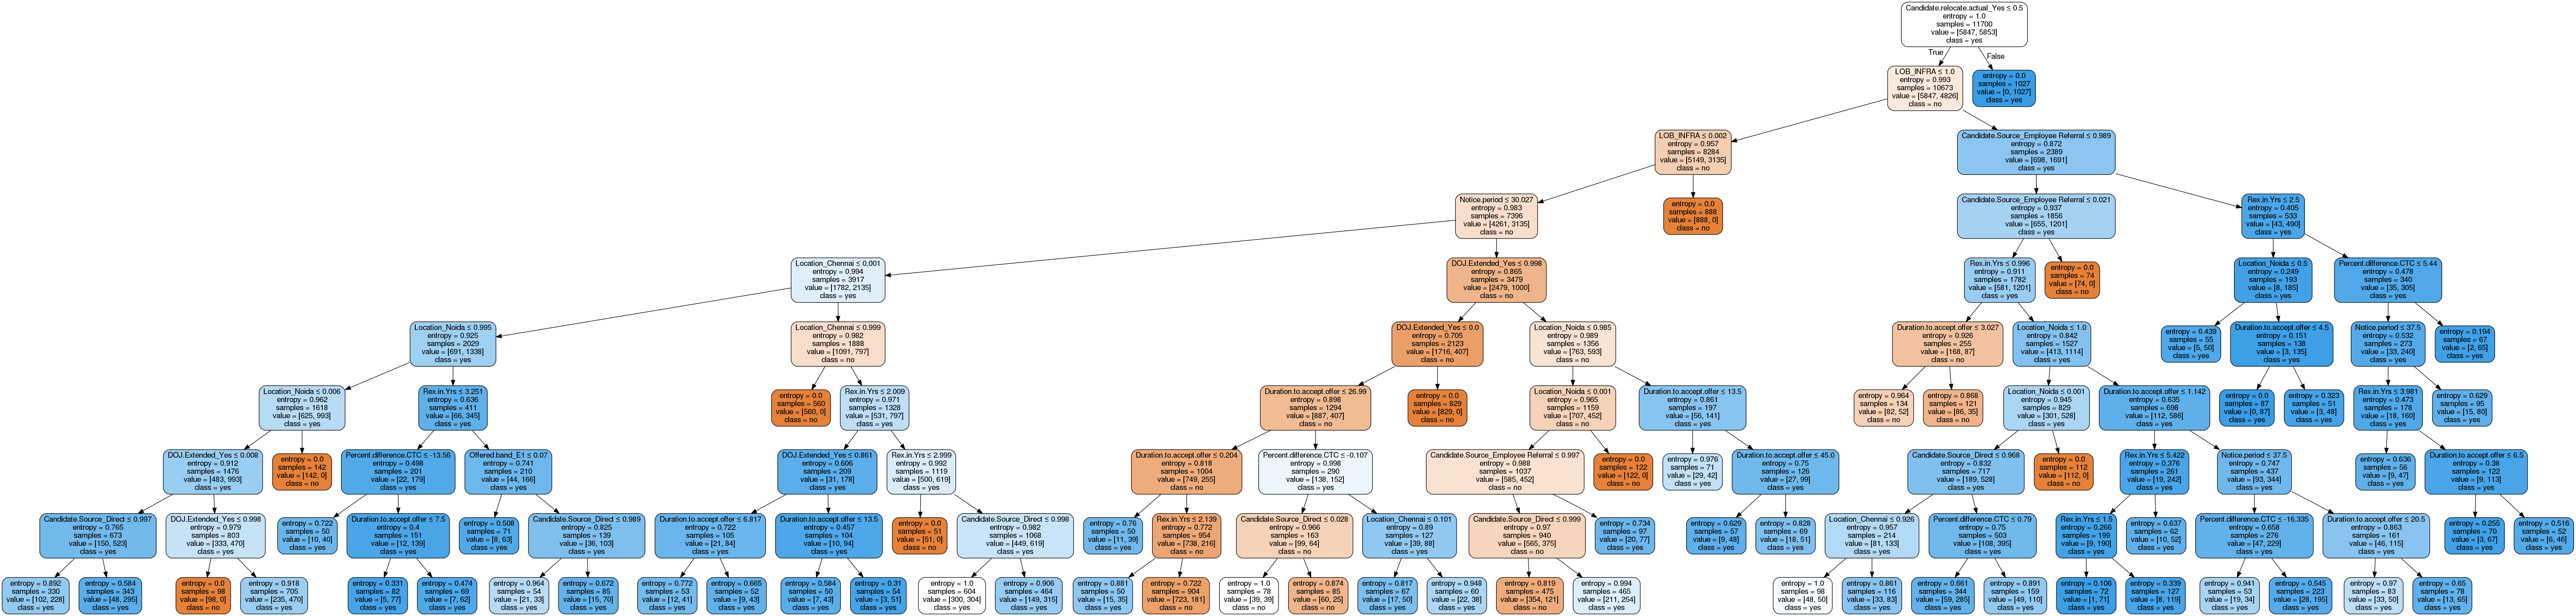

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_clf_tuned, out_file=dot_data, 
                feature_names=X_train_lasso_features.columns,
                filled=True, rounded=True,
                class_names=['no', 'yes'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
export_graphviz(tree_clf_tuned, out_file='hr_analytics_tree.dot', feature_names=X_train_lasso_features.columns,
                filled=True, rounded=True,
                class_names=['no', 'yes'],
                special_characters=True)
graph = pydotplus.graph_from_dot_file('hr_analytics_tree.dot')
graph.write_png('hr_analytics_tree.png')

True

# Observations

- If a candidate has to relocate, he will most likely join the company (as shown in root node split)

- Most people who don't have Line of Business as INFRA are not joining

- Most people who are referred directly or by another employee have a higher chance of joining

- People who don't get Chennai or Noida as their base location have a lesser chance of joining

- People with more than 30 days notice have a lesser chance of joining

- People who are not referred by Employees and not Direct have a lesser chance of joining

# Validations with Visualizations

In [38]:
df_final = df.copy()
df_final.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Status
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,ERS,Noida,Joined
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,Joined
2,No,3,45,E2,0.00,No,No,Male,Agency,4,INFRA,Noida,Joined
3,No,26,30,E2,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,Joined
4,Yes,1,120,E2,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,Joined


In [39]:
def notice_period(x):
  if x<15:
    return 'Less than 15'
  elif x<=30:
    return '15 to 30'
  else:
    return 'More than 30'
df_final['Notice_label'] = df_final['Notice.period'].apply(notice_period)
df_final.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Status,Notice_label
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,ERS,Noida,Joined,15 to 30
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,Joined,15 to 30
2,No,3,45,E2,0.00,No,No,Male,Agency,4,INFRA,Noida,Joined,More than 30
3,No,26,30,E2,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,Joined,15 to 30
4,Yes,1,120,E2,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,Joined,More than 30


In [41]:
df_not_joined = df_final[df_final.Status == 'Not Joined']
df_notice_group_not_joined = df_not_joined.groupby(['Notice_label', 'DOJ.Extended']).size().reset_index()
df_notice_group_not_joined.head()

,Notice_label,DOJ.Extended,0
0,15 to 30,No,419
1,15 to 30,Yes,346
2,Less than 15,No,31
3,Less than 15,Yes,20
4,More than 30,No,456


In [42]:
df_joined = df_final[df_final.Status == 'Joined']
df_notice_group_joined = df_joined.groupby(['Notice_label', 'DOJ.Extended']).size().reset_index()
df_notice_group_joined.head()

,Notice_label,DOJ.Extended,0
0,15 to 30,No,2455
1,15 to 30,Yes,1938
2,Less than 15,No,512
3,Less than 15,Yes,214
4,More than 30,No,915


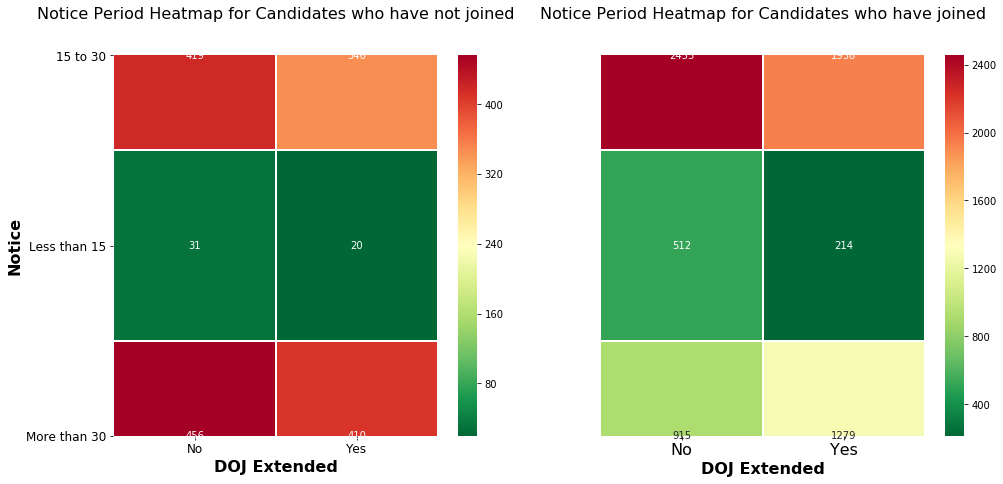

In [43]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Notice Period Heatmap for Candidates who have not joined', y=1.08, fontsize=16)
sns.heatmap(df_notice_group_not_joined.pivot('Notice_label', 'DOJ.Extended', 0), linewidths=1, cmap="RdYlGn_r",fmt='g', annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('DOJ Extended', fontsize=16, weight='bold')
plt.ylabel('Notice', fontsize=16, weight='bold')
plt.subplot(1,2,2)
plt.title('Notice Period Heatmap for Candidates who have joined', y=1.08, fontsize=16)
sns.heatmap(df_notice_group_joined.pivot('Notice_label', 'DOJ.Extended', 0), linewidths=1, cmap="RdYlGn_r",fmt='g', annot=True)
plt.xticks(fontsize=16)
plt.xlabel('DOJ Extended', fontsize=16, weight='bold')
plt.yticks([],rotation=0)
plt.ylabel('')
plt.show()

People who have given **notice period** of more than **30** days are not joining the company irrespective of whether they extended their <b>Date of Joining<b>

In [44]:
def is_location_chennai_or_noida(x):
  if x == 'Chennai' or x == 'Noida':
    return 'Chennai/Noida'
  else:
    return 'Other'
df_final['Location_label'] = df_final['Location'].apply(is_location_chennai_or_noida)
df_final.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Status,Notice_label,Location_label
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,ERS,Noida,Joined,15 to 30,Chennai/Noida
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,Joined,15 to 30,Chennai/Noida
2,No,3,45,E2,0.00,No,No,Male,Agency,4,INFRA,Noida,Joined,More than 30,Chennai/Noida
3,No,26,30,E2,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,Joined,15 to 30,Chennai/Noida
4,Yes,1,120,E2,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,Joined,More than 30,Chennai/Noida


In [45]:
df_location_group = df_final.groupby(['Location_label', 'Status']).size().reset_index()
df_location_group.head()

,Location_label,Status,0
0,Chennai/Noida,Joined,4848
1,Chennai/Noida,Not Joined,1029
2,Other,Joined,2465
3,Other,Not Joined,653


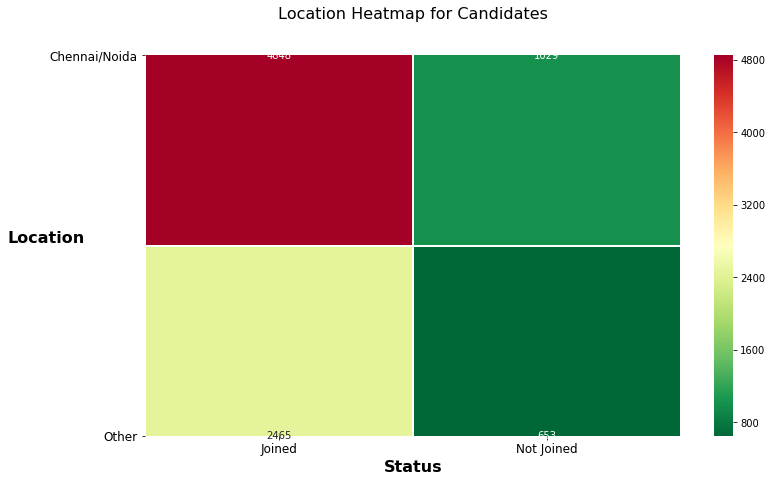

In [46]:
plt.figure(figsize=(12,7))
plt.title('Location Heatmap for Candidates', y=1.08, fontsize=16)
sns.heatmap(df_location_group.pivot('Location_label', 'Status', 0), linewidths=1, cmap="RdYlGn_r",fmt='g', annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Status', fontsize=16, weight='bold')
plt.ylabel('Location', fontsize=16, weight='bold', rotation=0)
plt.show()

This heatmap tells us that people prefer Chennai/Noida locations very much maybe due to some geographic reason.